In [1]:
import pandas
import seaborn
from matplotlib import pyplot
%matplotlib inline

from user_defined_plot_functions import plot

In [2]:
# Read in excel data
# hotel_data = pandas.read_excel("../data/booking_data.xlsx")

In [3]:
# Save back using parquet format.
# hotel_data.to_parquet("../data/booking_data.parquet", compression="snappy")

In [4]:
# Read in parquet file
hotel_data = pandas.read_parquet("../data/booking_data.parquet")

### Data Validation

In [5]:
hotel_data.shape

(119390, 17)

In [6]:
hotel_data_copy = hotel_data.copy()
hotel_data_copy.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


In [7]:
# Duplicated values
hotel_data_copy.duplicated().sum()

0

In [8]:
# Data info
hotel_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Booking ID            119390 non-null  int64         
 1   Hotel                 119390 non-null  object        
 2   Booking Date          119390 non-null  datetime64[ns]
 3   Arrival Date          119390 non-null  datetime64[ns]
 4   Lead Time             119390 non-null  int64         
 5   Nights                119390 non-null  int64         
 6   Guests                119390 non-null  int64         
 7   Distribution Channel  119390 non-null  object        
 8   Customer Type         119390 non-null  object        
 9   Country               118902 non-null  object        
 10  Deposit Type          119390 non-null  object        
 11  Avg Daily Rate        119390 non-null  float64       
 12  Status                119390 non-null  object        
 13 

From the above result, the datatypes appears to be accurate, except for the **Country** column that appears to have missing values.

In [9]:
hotel_data_copy.isnull().sum()

Booking ID                0
Hotel                     0
Booking Date              0
Arrival Date              0
Lead Time                 0
Nights                    0
Guests                    0
Distribution Channel      0
Customer Type             0
Country                 488
Deposit Type              0
Avg Daily Rate            0
Status                    0
Status Update             0
Cancelled (0/1)           0
Revenue                   0
Revenue Loss              0
dtype: int64

The above validates the observation about missing values in the **Country** column.

Let's take a look at the Country feature to see these mising data

In [10]:
hotel_data_copy[hotel_data_copy.Country.isna()]

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
30,31,Resort,2015-03-05,2015-07-01,118,14,1,Direct,Transient,None,No Deposit,62.0,Check-Out,2015-07-15,0,868.0,0.0
4127,4128,Resort,2016-02-15,2016-02-15,0,0,0,Offline Travel Agent,Transient,None,No Deposit,0.0,Canceled,2016-02-15,1,0.0,0.0
7092,7093,Resort,2016-07-13,2016-07-21,8,1,1,Corporate,Transient,None,No Deposit,73.0,Canceled,2016-07-20,1,0.0,-73.0
7860,7861,Resort,2016-07-22,2016-08-30,39,5,2,Direct,Transient,None,No Deposit,159.0,Canceled,2016-07-22,1,0.0,-795.0
8779,8780,Resort,2016-10-13,2016-10-13,0,1,1,Corporate,Transient,None,No Deposit,50.0,Canceled,2016-10-13,1,0.0,-50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,65909,City,2017-04-10,2017-04-10,0,0,0,Corporate,Transient,None,No Deposit,0.0,Canceled,2017-04-10,1,0.0,0.0
65909,65910,City,2017-04-10,2017-04-10,0,0,0,Corporate,Transient,None,No Deposit,0.0,Canceled,2017-04-10,1,0.0,0.0
65910,65911,City,2017-04-10,2017-04-10,0,0,0,Corporate,Transient,None,No Deposit,0.0,Canceled,2017-04-10,1,0.0,0.0
80830,80831,City,2015-11-19,2015-11-23,4,3,1,Online Travel Agent,Transient-Party,None,No Deposit,70.0,Check-Out,2015-11-26,0,210.0,0.0


In [11]:
# Calculate the percentage of missing data to the whole dataset
hotel_data.Country.isnull().sum() / hotel_data.shape[0] * 100

0.40874445095904177

In [12]:
hotel_data_copy.Country.value_counts()

Country
Portugal          48590
United Kingdom    12129
France            10415
Spain              8568
Germany            7287
                  ...  
Djibouti              1
Botswana              1
Honduras              1
Virgin Islands        1
Sierra Leone          1
Name: count, Length: 174, dtype: int64

There are 488 missing data, constituting approximately **0.4087** percent of the whole dataset. These data will be replaced with "N/A" since it will not have any significant effect on the insights and trend in the data. Some times, the missing data are filled with the most occuring data in the column (in this case Portugal).

Also **Avg Daily Rate** will be renamed to **Average Daily Rate,** **Cancelled (0/1)** will be renamed to **Cancelled** and since the data represents **Yes** and **No** for **1** and **0** respectively, the data in the column will be modified and the datatype changed accordingly.

In [13]:
# Replace missing rows in Country column.
hotel_data_copy.Country.fillna("N/A", inplace=True)

# Renaming columns
hotel_data_copy.rename(columns={"Avg Daily Rate": "Average Daily Rate", "Cancelled (0/1)": "Cancelled"}, inplace=True)

# Updating Cancelled column
hotel_data_copy.Cancelled.replace({0: "No", 1: "Yes"}, inplace=True)

# Check
display(hotel_data_copy.info())
hotel_data_copy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Booking ID            119390 non-null  int64         
 1   Hotel                 119390 non-null  object        
 2   Booking Date          119390 non-null  datetime64[ns]
 3   Arrival Date          119390 non-null  datetime64[ns]
 4   Lead Time             119390 non-null  int64         
 5   Nights                119390 non-null  int64         
 6   Guests                119390 non-null  int64         
 7   Distribution Channel  119390 non-null  object        
 8   Customer Type         119390 non-null  object        
 9   Country               119390 non-null  object        
 10  Deposit Type          119390 non-null  object        
 11  Average Daily Rate    119390 non-null  float64       
 12  Status                119390 non-null  object        
 13 

None

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Average Daily Rate,Status,Status Update,Cancelled,Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,No,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,No,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,No,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,No,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,No,196.0,0.0


In [14]:
# Revenue loss
hotel_data_copy[hotel_data_copy["Revenue Loss"] < 0]

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Average Daily Rate,Status,Status Update,Cancelled,Revenue,Revenue Loss
8,9,Resort,2015-04-07,2015-07-01,85,3,2,Online Travel Agent,Transient,Portugal,No Deposit,82.0,Canceled,2015-05-06,Yes,0.0,-246.0
9,10,Resort,2015-04-17,2015-07-01,75,3,2,Offline Travel Agent,Transient,Portugal,No Deposit,105.5,Canceled,2015-04-22,Yes,0.0,-316.5
10,11,Resort,2015-06-08,2015-07-01,23,4,2,Online Travel Agent,Transient,Portugal,No Deposit,123.0,Canceled,2015-06-23,Yes,0.0,-492.0
27,28,Resort,2015-05-02,2015-07-01,60,7,2,Online Travel Agent,Transient,Portugal,No Deposit,107.0,Canceled,2015-05-11,Yes,0.0,-749.0
32,33,Resort,2015-03-27,2015-07-01,96,10,2,Direct,Transient,Portugal,No Deposit,108.3,Canceled,2015-05-29,Yes,0.0,-1083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108829,108830,City,2017-04-11,2017-05-06,25,3,1,Corporate,Transient,France,No Deposit,125.0,No-Show,2017-05-06,Yes,0.0,-375.0
111355,111356,City,2017-06-01,2017-06-05,4,1,1,Corporate,Transient,Portugal,No Deposit,65.0,Canceled,2017-06-05,Yes,0.0,-65.0
111924,111925,City,2017-05-24,2017-05-31,7,1,1,Corporate,Transient,Portugal,No Deposit,65.0,Canceled,2017-05-31,Yes,0.0,-65.0
111925,111926,City,2017-07-11,2017-07-17,6,1,1,Corporate,Transient,Portugal,No Deposit,65.0,No-Show,2017-07-17,Yes,0.0,-65.0


In [15]:
# Descriptive Statistics
select_columns = ["Lead Time", "Nights", "Guests", "Average Daily Rate", "Revenue", "Revenue Loss"]
hotel_data_copy[select_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lead Time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0000,737.0
Nights,119390.0,3.427900,2.557439,0.00,2.00,3.000,4.0000,69.0
Guests,119390.0,1.968239,0.722394,0.00,2.00,2.000,2.0000,55.0
Average Daily Rate,119390.0,101.831122,50.535790,-6.38,69.29,94.575,126.0000,5400.0
Revenue,119390.0,247.931966,300.921393,-63.80,0.00,176.000,342.9775,7590.0
Revenue Loss,119390.0,-109.916242,277.102641,-6300.00,0.00,0.000,0.0000,0.0


From the descriptive statistics, it can be observed that outlier values exists in almost all the features. This will be further explored using histograms.

In [16]:
hotel_data_copy.shape

(119390, 17)

### Exploratory Analysis
Outlier values

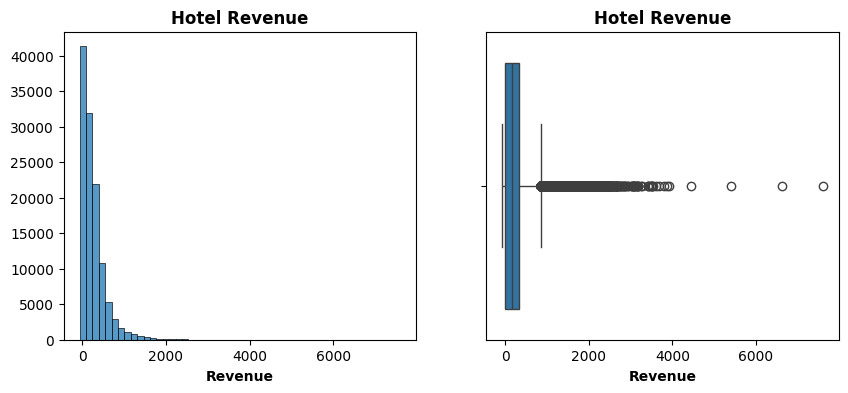

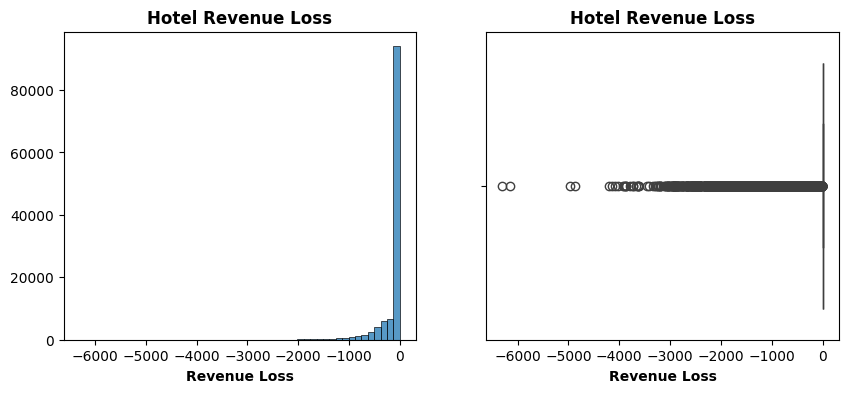

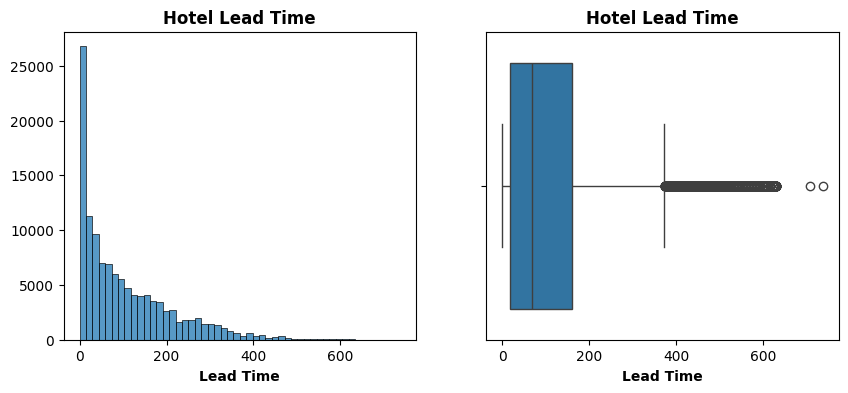

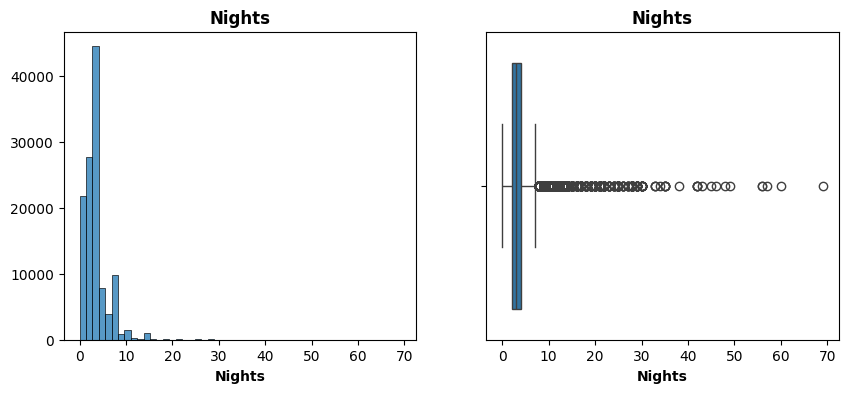

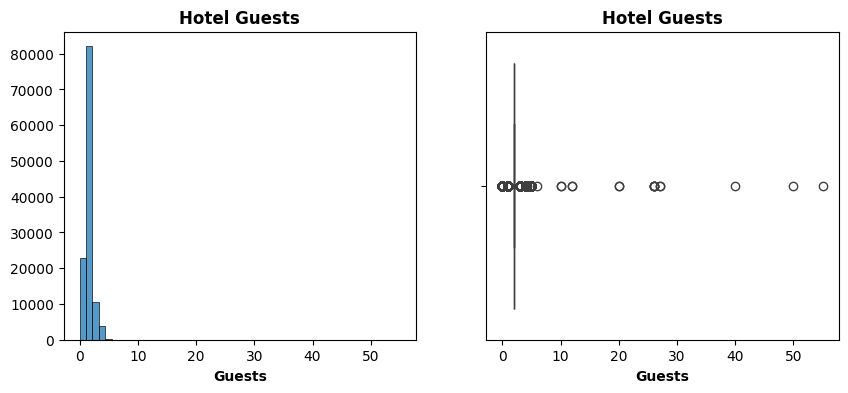

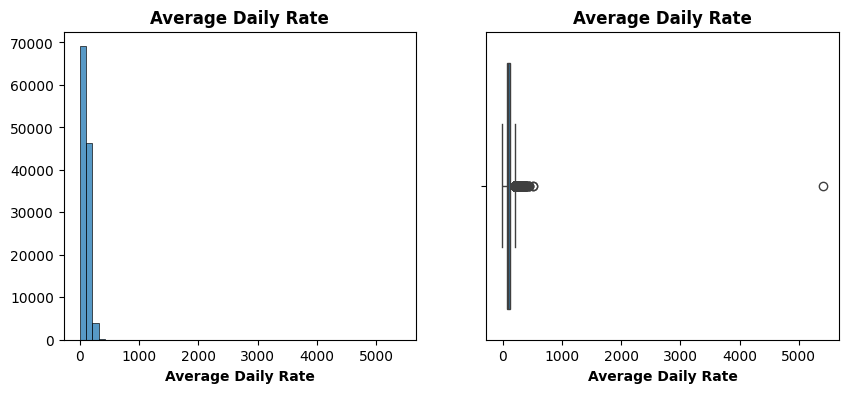

In [17]:
# Revenue
pyplot.figure(figsize = [10, 4])
pyplot.subplot(1, 2, 1)
plot(kind=seaborn.histplot, data=hotel_data_copy, x_arg="Revenue", title="Hotel Revenue", x_label="Revenue")
pyplot.subplot(1, 2, 2)
plot(kind=seaborn.boxplot, data=hotel_data_copy, x_arg="Revenue", title="Hotel Revenue", x_label="Revenue")

# Revenue Loss
pyplot.figure(figsize = [10, 4])
pyplot.subplot(1, 2, 1)
plot(kind=seaborn.histplot, data=hotel_data_copy, x_arg="Revenue Loss", title="Hotel Revenue Loss", x_label="Revenue Loss")
pyplot.subplot(1, 2, 2)
plot(kind=seaborn.boxplot, data=hotel_data_copy, x_arg="Revenue Loss", title="Hotel Revenue Loss", x_label="Revenue Loss")

# Lead Time
pyplot.figure(figsize = [10, 4])
pyplot.subplot(1, 2, 1)
plot(kind=seaborn.histplot, data=hotel_data_copy, x_arg="Lead Time", title="Hotel Lead Time", x_label="Lead Time")
pyplot.subplot(1, 2, 2)
plot(kind=seaborn.boxplot, data=hotel_data_copy, x_arg="Lead Time", title="Hotel Lead Time", x_label="Lead Time")

# Nights
pyplot.figure(figsize = [10, 4])
pyplot.subplot(1, 2, 1)
plot(kind=seaborn.histplot, data=hotel_data_copy, x_arg="Nights", title="Nights", x_label="Nights")
pyplot.subplot(1, 2, 2)
plot(kind=seaborn.boxplot, data=hotel_data_copy, x_arg="Nights", title="Nights", x_label="Nights")

# Guests
pyplot.figure(figsize = [10, 4])
pyplot.subplot(1, 2, 1)
plot(kind=seaborn.histplot, data=hotel_data_copy, x_arg="Guests", title="Hotel Guests", x_label="Guests")
pyplot.subplot(1, 2, 2)
plot(kind=seaborn.boxplot, data=hotel_data_copy, x_arg="Guests", title="Hotel Guests", x_label="Guests")

# Average Daily Rate
pyplot.figure(figsize = [10, 4])
pyplot.subplot(1, 2, 1)
plot(kind=seaborn.histplot, data=hotel_data_copy, x_arg="Average Daily Rate", title="Average Daily Rate", x_label="Average Daily Rate")
pyplot.subplot(1, 2, 2)
plot(kind=seaborn.boxplot, data=hotel_data_copy, x_arg="Average Daily Rate", title="Average Daily Rate", x_label="Average Daily Rate")

The above shows the dataset is ridden with outliers. If we are building a prediction model, these outliers will definitley need to be removed, but since we are performing an analysis on the dataset, we will keep them.

# Explanatory Analysis: Performed using Power BI

In [23]:
hotel_data_copy.to_parquet("../data/booking_data_cleaned.parquet", compression="snappy")

In [24]:
hotel_data_copy.to_csv("../data/booking_data_cleaned.csv", index=False)